In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
med_ins = pd.read_csv('insurance.csv')  # converting the csv file to a pandas Dataframe
med_ins['smoker'] = med_ins['smoker'].map({'yes': 1, 'no': 0}) # Dtype object to int64 
med_ins['sex'] = med_ins['sex'].map({'female': 0, 'male': 1}) # Dtype object to int64
print(med_ins.info())
print(med_ins.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB
None
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000

[]

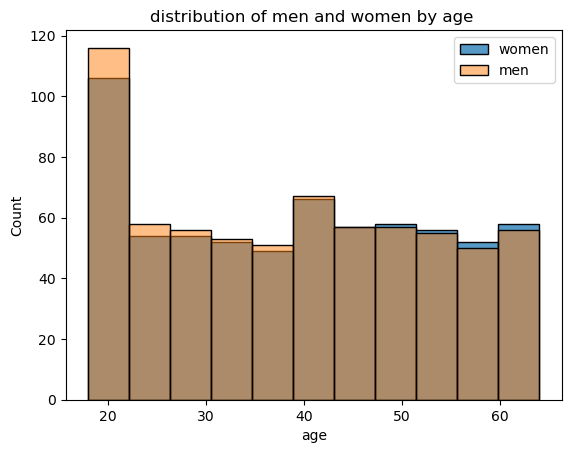

In [3]:
sns.histplot( data= med_ins['age'][med_ins['sex']== 0], label= 'women').set_title('distribution of men and women by age ')
sns.histplot( data= med_ins['age'][med_ins['sex']== 1], alpha=0.5, label= 'men')
plt.legend()
plt.plot()

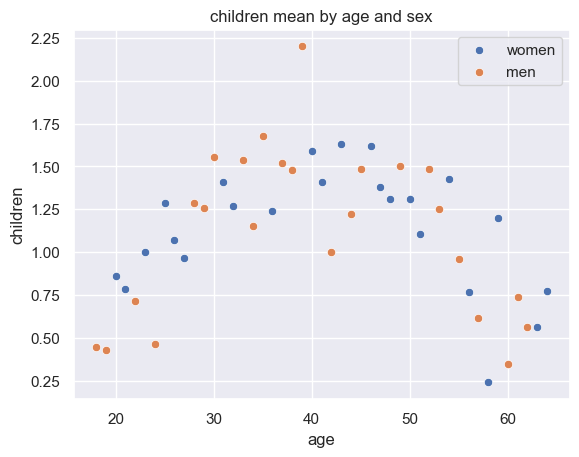

In [4]:
groupby_age_children = med_ins.groupby('age')['children'].mean()
sns.set_theme(style="darkgrid")
sns.scatterplot(data = groupby_age_children[med_ins['sex'] == 0], label='women').set_title('children mean by age and sex' )
sns.scatterplot(data = groupby_age_children[med_ins['sex'] == 1], label='men')
plt.show()

None


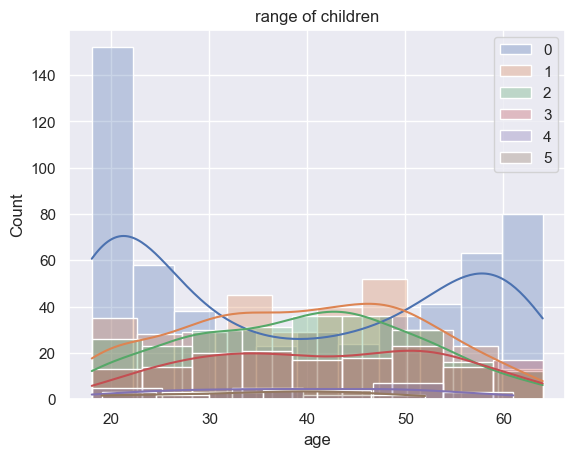

In [5]:
def children_age(): 
    for number in range(0,6):
        sns.histplot(data = med_ins['age'][med_ins['children'] == number], alpha=0.3, kde=True, label= number)
print(children_age())
plt.legend()
plt.title('range of children')
plt.show()

smoker           0   1
region    sex         
northeast 0    132  29
          1    125  38
northwest 0    135  29
          1    132  29
southeast 0    139  36
          1    134  55
southwest 0    141  21
          1    126  37


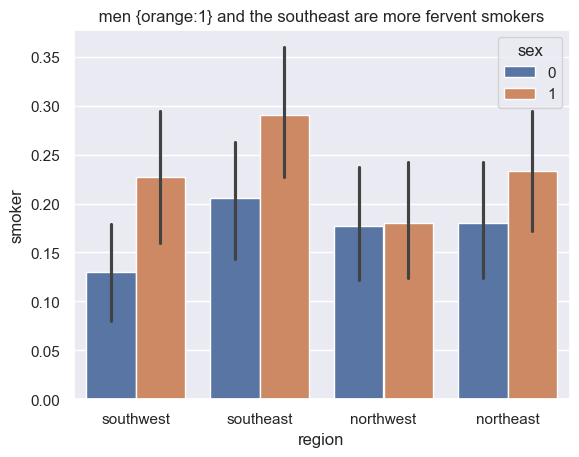

In [6]:
region_smoker_counts = pd.crosstab([med_ins['region'], med_ins['sex']], med_ins['smoker'])
print(region_smoker_counts)
sns.barplot(data=med_ins, x='region', y='smoker', hue='sex').set_title(' men {orange:1} and the southeast are more fervent smokers ')
plt.show()

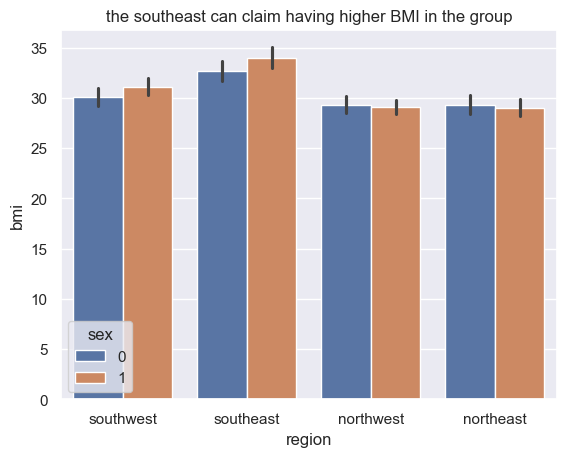

In [7]:
sns.barplot(data=med_ins, x='region', y='bmi', hue='sex').set_title('the southeast can claim having higher BMI in the group')
plt.show()

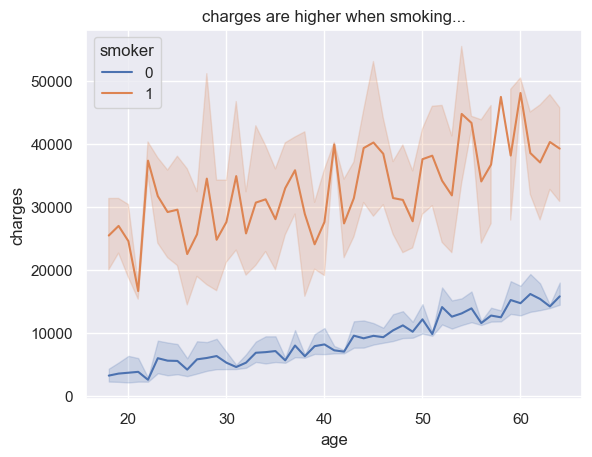

In [8]:
sns.lineplot(x=med_ins['age'], y=med_ins['charges'], hue='smoker', data= med_ins).set_title('charges are higher when smoking...') 
plt.show()

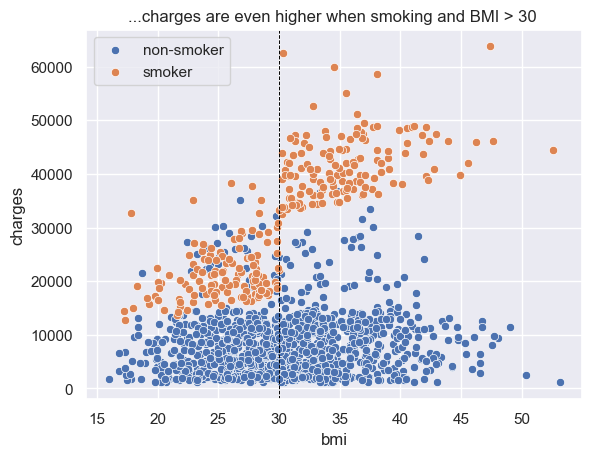

In [9]:
smoker_data_False = med_ins[med_ins['smoker'] == 0]
smoker_data_True = med_ins[med_ins['smoker'] == 1]
groupby_bmi_charges = smoker_data_False.groupby('bmi')['charges'].mean()
sns.scatterplot(data= smoker_data_False, x='bmi' , y='charges', label= 'non-smoker')
sns.scatterplot(data= smoker_data_True, x='bmi', y='charges', label='smoker')
plt.axvline(x=30, c='black', linestyle='--', linewidth=0.7)
plt.title('...charges are even higher when smoking and BMI > 30 ')
plt.show()

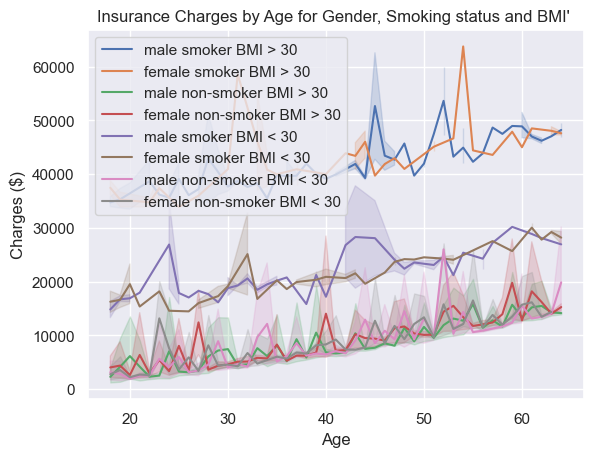

In [10]:
column = ['sex', 'smoker', 'bmi']
index = [1, 0, 1, 0, 30.0, 30.0]
male = 'male'
female = 'female'
smoker = 'smoker'
non_smoker = 'non_smoker'
bmi30_plus = 'bmi30_plus'
bmi30_min = 'bmi30_min'
column_list = { male: (med_ins[column[0]]== index[0]),
female : (med_ins[column[0]]== index[1]),
smoker : (med_ins[column[1]]== index[2]),
non_smoker : (med_ins[column[1]]== index[3]),
bmi30_plus :(med_ins[column[2]] > index[4]),
bmi30_min : (med_ins[column[2]]<= index[5]),
}
gender = [male, female]
smoker_status = [smoker, non_smoker]
bmi_category = [bmi30_plus, bmi30_min]

def filter_insurance_data(med_ins, gender: str, smoker_status: str, bmi_category: str):
    return med_ins[column_list.get(gender) & column_list.get(smoker_status) & column_list.get(bmi_category)]

filtered_groups = {
    'male smoker BMI > 30': filter_insurance_data(med_ins, 'male', 'smoker', 'bmi30_plus'),
    'female smoker BMI > 30': filter_insurance_data(med_ins, 'female', 'smoker', 'bmi30_plus'),
    'male non-smoker BMI > 30': filter_insurance_data(med_ins, 'male', 'non_smoker', 'bmi30_plus'),
    'female non-smoker BMI > 30': filter_insurance_data(med_ins, 'female', 'non_smoker', 'bmi30_plus'),
    'male smoker BMI < 30': filter_insurance_data(med_ins, 'male', 'smoker', 'bmi30_min'),
    'female smoker BMI < 30': filter_insurance_data(med_ins, 'female', 'smoker', 'bmi30_min'),
    'male non-smoker BMI < 30': filter_insurance_data(med_ins, 'male', 'non_smoker', 'bmi30_min'),
    'female non-smoker BMI < 30': filter_insurance_data(med_ins, 'female', 'non_smoker', 'bmi30_min')
}

label = filtered_groups.keys()

def plot_charges_by_age(data_groups):

    for label, data in data_groups.items():
        sns.lineplot(data=data, x='age', y='charges', label=label)
        sns.set(rc={"figure.figsize":(12, 12)})

plot_charges_by_age(filtered_groups)
plt.title('''Insurance Charges by Age for Gender, Smoking status and BMI' ''')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.legend()
plt.show()
    
